<h1>Лабораторная работа 6</h1>
<h2>Линейная регрессия в sklearn</h2>

Выполнил: 6131 Чаплыгин Алексей Олегович

Ссылки на теорию:

https://habr.com/ru/company/ods/blog/323890/
https://habr.com/ru/post/278513/
https://habr.com/ru/post/279117/
0 Найти и загрузить датасет, подходящий для задачи регрессии. Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

1 Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

2 Визуализировать heatmap-матрицу кореллированности признаков. См. пример.

3 Визуализировать взаимосвязь между целевой переменной и каждым признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной. См. пример.

4 Разделить набор данных на обучающую и тестовую выборки

5 Линейная регрессия

5.1 Обучить модель линейной регрессии (LinearRegression)

5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

5.3 Вывести model.coef_ и model.intercept_

5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же, как мы строили графики для feature_importance в теме с деревьями). Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси.

6 Модель Lasso

6.1 Обучить модель регрессии (Lasso), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

6.1 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

6.3 Для лучшей модели вывести model.coef_ и model.intercept_

6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

7 Модель Ridge

7.1 Обучить модель регрессии (Ridge), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

7.3 Для лучшей модели вывести model.coef и model.intercept

7.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

8 Модель ElasticNet

8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

8.3 Для лучшей модели вывести model.coef и model.intercept

8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

9 Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

10 Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True ). Обучаем лучшую модель.

11 Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

12 Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы.

13 Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

Замечания: При использовании GridSearchCV для извлечения параметров лучшей модели используем атрибут с объектом лучшей модели: gs.bestestimator, например извлекаем вектор коэффициентов: gs.bestestimator.coef_

Логика всего задания проста:

Ищем лучший регрессор на вещественных признаках

Пробуем добавить категориальные (преобразованные в бинарные), смотрим как изменилось качество, стала ли модель лучше работать

Нормализуем признаки через StandardScaler, смотрим, повлияло ли это на качество модели.

In [1]:
# PRE INIT ROW
# for new libraries if need
# !pip install

In [2]:
# INIT IMPORT
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from pandas import get_dummies

<h2>0. Набор данных</h2>
Найти и загрузить датасет, подходящий для задачи регрессии. Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.
</br>
Используемый в работе набор данных "Vehicle dataset" доступен по следующей ссылке:https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho, этот набор данных содержит информацию о подержанных автомобилях. Эти данные могут быть использованы для многих целей, таких как прогнозирование цен, чтобы проиллюстрировать использование линейной регрессии в машинном обучении.</br>
В наборе данных содержится таблица с 8 столбцами.</br>
<table border="1">
   <caption>Vehicle dataset</caption>
   <tr>
    <th>Номер столбца</th>
    <th>Название столбца</th>
    <th>Описание столбца</th>
   </tr>
   <tr><td>1</td><td>fixed acidity</td><td>Название</td></tr>
   <tr><td>2</td><td>yeary</td><td>Год выпуска</td></tr>
   <tr><td>3</td><td>selling_price</td><td>Цена продажи</td></tr>
   <tr><td>4</td><td>km_driven</td><td>Пробег</td></tr>
   <tr><td>5</td><td>fuel</td><td>Тип топлива</td></tr>
   <tr><td>6</td><td>seller_type</td><td>Тип продавца</td></tr>
   <tr><td>7</td><td>transmission</td><td>Тип трансмиссии</td></tr>
   <tr><td>8</td><td>owner</td><td>Тип владельца</td></tr>
</table>

In [3]:
df = pd.read_csv('data/CAR DETAILS FROM CAR DEKHO.csv', sep=',')

In [4]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


#### 1. Временно удалить категориальные / бинарные признаки, оставив только вещественные

In [5]:
df_new = df.drop('name', axis=1)
df_new = df_new.drop('fuel', axis=1)
df_new = df_new.drop('seller_type', axis=1)
df_new = df_new.drop('transmission', axis=1)
df_new = df_new.drop('owner', axis=1)
df_new.head()

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000


#### 2. Визуализировать heatmap-матрицу кореллированности признаков.

<AxesSubplot:>

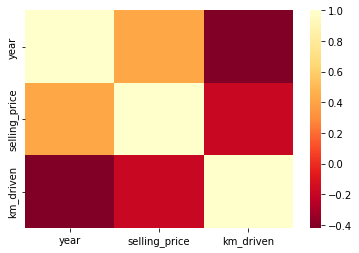

In [6]:
sns.heatmap(df_new.corr(), cmap = "YlOrRd_r")

#### 3. Визуализировать взаимосвязь между целевой переменной и каждым признаком 

Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.

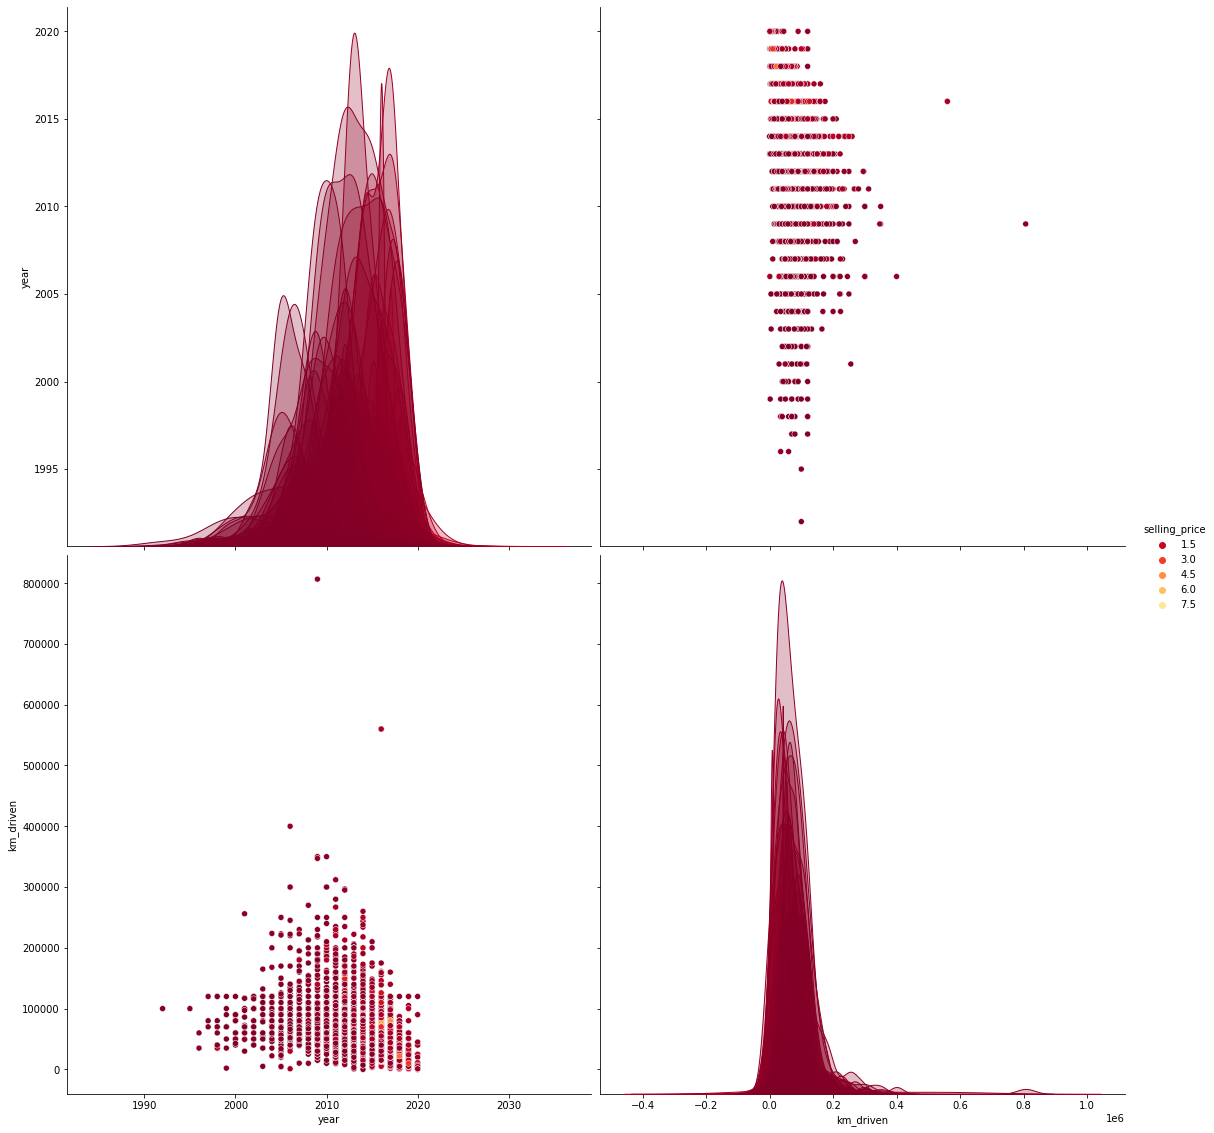

In [7]:
sns.pairplot(df_new, hue = "selling_price", palette = "YlOrRd_r", height=8)

#### 4. Разделить набор данных на обучающую и тестовую выборки

In [8]:
X = df_new.drop('selling_price', axis = 1)
Y = df_new.selling_price

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 25)

In [10]:
X_train

,year,km_driven
3692,2012,129627
3201,2011,62601
1089,2018,10000
1668,2014,244000
2708,2011,40000
...,...,...
1175,2013,13500
255,2017,64000
2934,2010,48781
2191,2018,10000


#### 5. Линейная регрессия

##### 5.1 Обучить модель линейной регрессии (LinearRegression)

In [11]:
# обучение модели
model_regress = LinearRegression()
model_regress.fit(X_train, Y_train)
pred_train = model_regress.predict(X_train)
pred_test = model_regress.predict(X_test)

##### 5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе


In [12]:
def metrics(pred_model, Y_data):
    mae = mean_absolute_error(Y_data, pred_model)
    mse = mean_squared_error(Y_data, pred_model)
    r2 = r2_score(Y_data, pred_model)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('R2: ', r2)

In [13]:
print('Метрики на обущающем наборе')
metrics(pred_train, Y_train)

Метрики на обущающем наборе
MAE:  272598.0635914248
MSE:  289338590244.18494
R2:  0.16639087671767694


In [14]:
print('Метрики на тестовом наборе')
metrics(pred_test, Y_test)

Метрики на тестовом наборе
MAE:  259702.11852172806
MSE:  240679849978.08307
R2:  0.19036683975893065


##### 5.3 Вывести model.coef_ и model.intercept_

In [15]:
def intercept_coef(model):
    importance = model_regress.coef_
    print('coef: ', importance)
    intercept = model_regress.intercept_
    print('intercept: ', intercept)

In [16]:
intercept_coef(model_regress)

coef:  [ 5.60098991e+04 -2.26231281e-01]
intercept:  -112233025.58307615


##### 5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках 

Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси.

In [17]:
def barh_plot(model, X_data):
    attribute = X_data.columns.values
    importance = model.coef_
    list1 = np.vstack([importance, attribute]).T
    list2 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')

     importance  attribute
1     -0.226231  km_driven
0  56009.899055       year


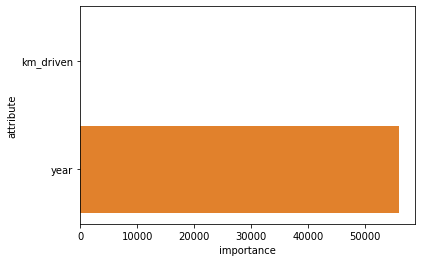

In [18]:
barh_plot(model_regress, X_train)

#### 6. Модель Lasso

##### 6.1 Обучить модель регрессии (Lasso), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [19]:
model_lasso = Lasso()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 100, 0.01)}
model_lasso = GridSearchCV(model_lasso, parametrs, refit = True)
model_lasso.fit(X_train, Y_train)

print(model_lasso.best_params_)

{'alpha': 99.99000000000001}


In [20]:
# обучение модели
model_lasso = Lasso(alpha = 0.01)
model_lasso.fit(X_train, Y_train)
pred_lasso_train = model_lasso.predict(X_train)
pred_lasso_test = model_lasso.predict(X_test)

##### 6.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [21]:
print('Метрики на обущающем наборе')
metrics(pred_lasso_train, Y_train)

Метрики на обущающем наборе
MAE:  272598.0636172994
MSE:  289338590244.1852
R2:  0.16639087671767627


In [22]:
print('Метрики на тестовом наборе')
metrics(pred_lasso_test, Y_test)

Метрики на тестовом наборе
MAE:  259702.11854805276
MSE:  240679849981.1879
R2:  0.19036683974848612


##### 6.3 Для лучшей модели вывести model.coef_ и model.intercept_

In [23]:
intercept_coef(model_lasso)

coef:  [ 5.60098991e+04 -2.26231281e-01]
intercept:  -112233025.58307615


##### 6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

     importance  attribute
1     -0.226231  km_driven
0  56009.899108       year


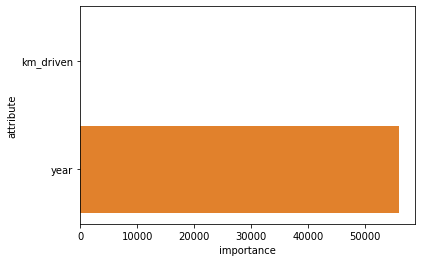

In [24]:
barh_plot(model_lasso, X_train)

#### 7. Модель Ridge

##### 7.1 Обучить модель регрессии (Ridge), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [25]:
model_ridge = Ridge()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 100, 0.01)}
model_ridge = GridSearchCV(model_ridge, parametrs, refit = True)
model_ridge.fit(X_train, Y_train)

print(model_ridge.best_params_)

{'alpha': 99.99000000000001}


In [26]:
# обучение модели
model_ridge = Ridge(alpha = 0.04)
model_ridge.fit(X_train, Y_train)
pred_ridge_train = model_ridge.predict(X_train)
pred_ridge_test = model_ridge.predict(X_test)

##### 7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [27]:
print('Метрики на обущающем наборе')
metrics(pred_ridge_train, Y_train)

Метрики на обущающем наборе
MAE:  272598.0410532834
MSE:  289338590244.21747
R2:  0.16639087671758324


In [28]:
print('Метрики на тестовом наборе')
metrics(pred_ridge_test, Y_test)

Метрики на тестовом наборе
MAE:  259702.0955969068
MSE:  240679847277.90384
R2:  0.19036684884217814


##### 7.3 Для лучшей модели вывести model.coef и model.intercept

In [29]:
intercept_coef(model_ridge)

coef:  [ 5.60098991e+04 -2.26231281e-01]
intercept:  -112233025.58307615


##### 7.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

     importance  attribute
1     -0.226233  km_driven
0  56009.852222       year


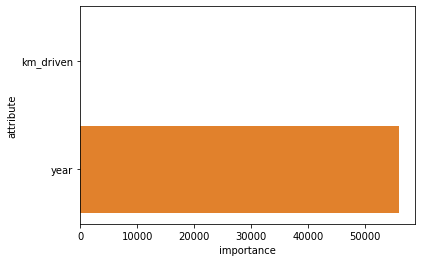

In [30]:
barh_plot(model_ridge, X_train)

#### 8. Модель ElasticNet

##### 8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

In [31]:
model_elastic = ElasticNet()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 1, 0.01), "l1_ratio": np.arange(0.01, 1, 0.01)}

model_elastic = GridSearchCV(model_elastic, parametrs, refit = True)
model_elastic.fit(X_train, Y_train)

print(model_elastic.best_params_)

{'alpha': 0.91, 'l1_ratio': 0.92}


In [32]:
# обучение модели
model_elastic = ElasticNet(alpha = 0.01, l1_ratio = 0.99)
model_elastic.fit(X_train, Y_train)
pred_elastic_train = model_elastic.predict(X_train)
pred_elastic_test = model_elastic.predict(X_test)

##### 8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [33]:
print('Метрики на обущающем наборе')
metrics(pred_elastic_train, Y_train)

Метрики на обущающем наборе
MAE:  272597.8802175057
MSE:  289338590246.31903
R2:  0.1663908767115284


In [34]:
print('Метрики на тестовом наборе')
metrics(pred_elastic_test, Y_test)

Метрики на тестовом наборе
MAE:  259701.93200172653
MSE:  240679828010.84235
R2:  0.19036691365546388


##### 8.3 Для лучшей модели вывести model.coef и model.intercept

In [35]:
intercept_coef(model_elastic)

coef:  [ 5.60098991e+04 -2.26231281e-01]
intercept:  -112233025.58307615


##### 8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

     importance  attribute
1     -0.226245  km_driven
0  56009.518014       year


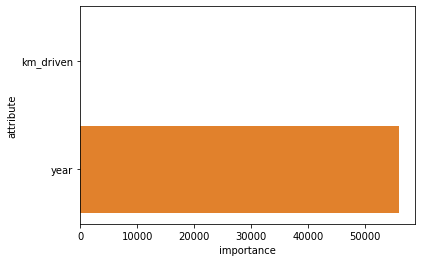

In [36]:
barh_plot(model_elastic, X_train)

#### 9. Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

Лучшая модель Lasso Regression

метрики на тестовом наборе
- MAE:  1.5742570476962772
- MSE:  4.652489607344447
- R2:  0.5109824651892559

#### 10. Возвращаем категориальные / бинарные признаки на место в датасет.

Категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True ). Обучаем лучшую модель.

In [37]:
df_full = get_dummies(df, drop_first = True)
df_full

,year,selling_price,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4336,2014,409999,80000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4337,2009,110000,83000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
4338,2016,865000,90000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [38]:
# Убирамем названия автомобилей
for i in np.unique(df['name']):
    name = 'name_'+ i
    if df_full.get(name, None) is not None:
        df_full.drop(columns = name, inplace = True)
    else:
        print(f'Name is not exist: {name}')

df_full.head()

Name is not exist: name_Ambassador CLASSIC 1500 DSL AC


,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,0,1,0,0


In [39]:
X = df_full.drop('selling_price', axis = 1)
#Y = df_new.selling_price
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 25)

In [40]:
model_best = Lasso(alpha = 0.01)
model_best.fit(X_train, Y_train)
pred_best_test = model_best.predict(X_test)

#### 11. Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

In [41]:
print('Метрики на тестовом наборе')
metrics(pred_best_test, Y_test)

Метрики на тестовом наборе
MAE:  240202.59009690647
MSE:  164218917306.79138
R2:  0.447577015680491


Значения метрик MAE и MSE улучшились, значительно 

#### 12. Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. 

Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы.

In [42]:
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)
X_new_test = scaler.fit_transform(X_test)

In [43]:
model_scaler = Lasso(alpha = 0.01)
model_scaler.fit(X_new_train, Y_train)
pred_scaler_test = model_scaler.predict(X_new_test)

print('Метрики на тестовом наборе')
metrics(pred_scaler_test, Y_test)

Метрики на тестовом наборе
MAE:  235009.042167006
MSE:  161625340394.456
R2:  0.45630165911056464


Значение метрики R2 стало больше. Значение метрик MAE и MSE незначительно уменьшилось.

#### 13. Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

In [44]:
X_scaler = pd.DataFrame(X_new_train, columns = X_train.columns)
X_scaler.head()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.250134,1.326595,1.022056,-0.01753,-0.07457,-0.988089,-1.721824,-0.143862,0.330767,-0.14497,-0.594027,-0.063324,-0.274449
1,-0.487783,-0.082971,1.022056,-0.01753,-0.07457,-0.988089,-1.721824,-0.143862,0.330767,-0.14497,1.683426,-0.063324,-0.274449
2,1.175760,-1.189177,-0.978420,-0.01753,-0.07457,1.012054,-1.721824,-0.143862,0.330767,-0.14497,-0.594027,-0.063324,-0.274449
3,0.225164,3.731875,1.022056,-0.01753,-0.07457,-0.988089,0.580780,-0.143862,0.330767,-0.14497,-0.594027,-0.063324,-0.274449
4,-0.487783,-0.558273,-0.978420,-0.01753,-0.07457,1.012054,0.580780,-0.143862,0.330767,-0.14497,1.683426,-0.063324,-0.274449


       importance                     attribute
8  -273176.302505           transmission_Manual
1   -41438.444847                     km_driven
6   -35343.228029        seller_type_Individual
10  -19381.720180            owner_Second Owner
3   -11469.212316                 fuel_Electric
12  -11040.964808             owner_Third Owner
9     -902.886549    owner_Fourth & Above Owner
5      383.863055                   fuel_Petrol
4     3039.505196                      fuel_LPG
11   10528.410305          owner_Test Drive Car
7    16739.540382  seller_type_Trustmark Dealer
2   144965.717837                   fuel_Diesel
0   151703.348442                          year


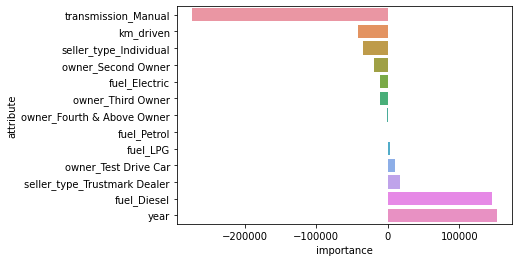

In [45]:
barh_plot(model_scaler, X_scaler)